## EDA Question: 
**Which country has the most Shark attacks?**
Data Source: [Global Shark Attack File](https://www.sharkattackfile.net/index.htm)

In [1]:
import pandas as pd

In [2]:
#load data from a csv file
shark_df = pd.read_csv('GSAF-1.csv')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(shark_df.shape[0], shark_df.shape[1]))

There are 6700 rows and 16 columns.


## 1. Identify any Problems with the Data. 
Scrutinize the data and determine if there are: missing values, variables represented with unsuitable data types, duplicates, unusual values.

In [3]:
#view samples of the data
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2021.09.10,10-Sep-2021,2021.0,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Swimming,Mohamed,M,NaN,Laceration to arm caused by metal object,NaN,NaN,No shark invovlement,Dr. M. Fouda & M. Salrm
1,2021.09.09,09-Sep-2021,2021.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Doyle Neilsen,M,!6,Minor injury to right arm,N,13h20,NaN,"Daytona Beach News-Journal, 9/14/2021"
2,2021.09.05,05-Sep-2021,2021.0,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing,Timothy Thompson,M,31,FATAL,Y,10h30,White xhark,"B. Myatt, GSAF"
3,2021.09.03.b,03-Sep-2021,2021.0,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,NaN,male,M,NaN,Wrist bitten,N,NaN,NaN,Anonymous
4,2021.08.28,28-Aug-2021,2021.0,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Boogie boarding,male,M,!!,Lacerations both sides of lower leg immediatel...,N,11h45,NaN,"T. Craig, GSAF & K. McMurray, TrackingShark.com"


In [4]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6696 non-null   object 
 1   Date                    6700 non-null   object 
 2   Year                    6698 non-null   float64
 3   Type                    6685 non-null   object 
 4   Country                 6650 non-null   object 
 5   Area                    6228 non-null   object 
 6   Location                6146 non-null   object 
 7   Activity                6131 non-null   object 
 8   Name                    6485 non-null   object 
 9   Sex                     6126 non-null   object 
 10  Age                     3769 non-null   object 
 11  Injury                  6668 non-null   object 
 12  Fatal (Y/N)             6147 non-null   object 
 13  Time                    3245 non-null   object 
 14  Species                 3684 non-null   

The variables above are not all represented using suitable types. At a minimum, the following changes are needed: 
- the year should be an integer
- the age should be an integer
- there are several fields that should be a string. Some of which include: country, area, location

`PRACTICE:` Can you identify any variables with the incorrect type?

**check for missing values**
- we need to count the frequency to determine how much of the data is missing.

In [5]:
#check the frequency of null values in each column
shark_df.isnull().sum()

#Alternative approach
#view the percentage of missing values (instead of the sum)
#shark_df.isnull().mean()*100

Case Number                  4
Date                         0
Year                         2
Type                        15
Country                     50
Area                       472
Location                   554
Activity                   569
Name                       215
Sex                        574
Age                       2931
Injury                      32
Fatal (Y/N)                553
Time                      3455
Species                   3016
Investigator or Source      19
dtype: int64

As you can see there are a lot of missing values in the data. If there are a few missing values, we can perform steps to handle them. However, seeing that so much data is missing, we can perform an additional step and determine if there are any patterns between these missing values.

In [6]:
shark_df.isnull().sum(axis=1).sort_values(ascending = False) #count the frequency of missing values in each row (i.e. how many columns are empty)


6523    8
5367    8
6473    8
6515    8
6558    8
       ..
4572    0
4570    0
1998    0
2000    0
4837    0
Length: 6700, dtype: int64

There are at most 8 variables with missing data. We can adopt a two-fold approach to handle missing data: 1) seeing that we have 16 columns, this means that we could potentially have rows with half the data missing. So lets delete rows with 50% (or more) of its data missing. 2) for the remaining data, if there are missing values, we can perform imputation, which is a technique thats used to replace the missing value with a suitable replacement.

## 2. Clean and Prepare the Data. 
We can handle missing data by substituting the NaN with a suitable alternative, such as the value that occurs the most or the average value in that particular column. Alternatively, if the missing values are a widespread issue (i.e. most of the variables are missing), then deletion is often performed.

The imputation strategy that you select will vary depending on the kind of data. If the column with the missing value is numeric, we'll often substitute the missing values with its mean or median value for that column. Otherwise, if its a categorical variable, we'll use the mode (i.e. the most frequent category).

The example below demonstrates imputation using the `Type` field.

In [7]:
#handle missing data -- imputation
shark_df['Type'].value_counts(dropna=False) 

Unprovoked             4908
Provoked                613
Invalid                 552
Watercraft              350
Sea Disaster            240
NaN                      15
Questionable             12
Boat                      7
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64

In [8]:
shark_df.loc[shark_df['Type'].isna(), 'Type'] = 'Unprovoked' #Note: there was a typo is the code from the lecture which is corrected here

In this dataset, most shark attack are usually Unprovoked. The example above replaced all missing `Type` with **Unprovoked** because it was the most frequenlty occuring value. Now that we cleaned the `Type` variable, we can create a bar chart to visualize the data.

<Axes: >

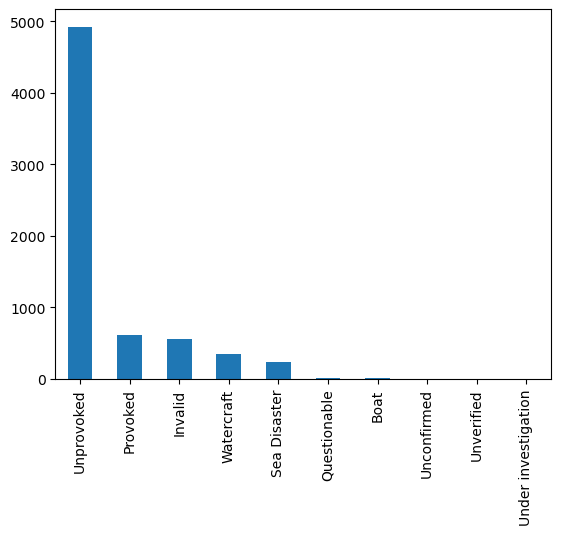

In [9]:
shark_df['Type'].value_counts().plot(kind='bar')

In [10]:
#PRACTICE: Can you identify any suitable field than can be imputed?

In [11]:
#Handle missing data -- deletion
shark_df = shark_df[shark_df.isnull().sum(axis=1) < 4] #delete rows with 4 or more missing variables (in each row)


In [12]:
shark_df.shape

(5715, 16)

We deleted rows with a high frequency of missing values but you'll notice that we now have ~1000 less rows. This is the cost that associated with data prep and this is the reason that deletion is not often the first course of action.

**Let's now convert the fields to a suitable data type**

In [13]:
shark_df['Country']  = shark_df['Country'].astype('string')
shark_df['Area']     = shark_df['Area'].astype('string')
shark_df['Location'] = shark_df['Location'].astype('string')

In [14]:
#make year an integer
shark_df['Year']  = shark_df['Year'].astype(int)

In [15]:
shark_df.dtypes #verify if the change occured

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   string
Area                      string
Location                  string
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
dtype: object

In [16]:
shark_df.drop_duplicates(inplace=True) #remove any duplicate rows

In [17]:
shark_df.shape

(5715, 16)

In [18]:
#PRACTICE: Can you identify any variables with the incorrect type?

## 3. Summarize and Visualize the Data. 

Lets determine which country has the most shark attacks

<Axes: >

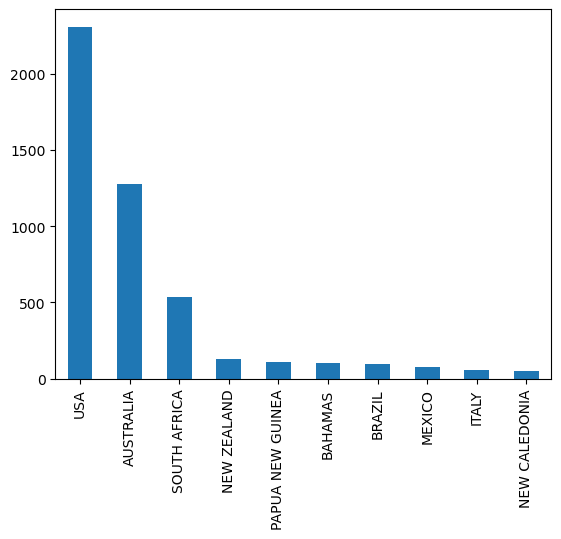

In [19]:
top_ten = shark_df['Country'].value_counts().head(10)

top_ten.plot(kind='bar')

This is surprising! The US has the higherst number of shark attacks. I'm now curious how many attacks occur each year? This EDA isn't over, we'll continue the next time.

In [20]:

#PRACTICE: which country has the most fatal shark attacks?
